In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
df = pd.read_csv('avocado.csv')
print(df.head().to_string(index=True))


   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225    4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16     8696.87     8603.62       93.25          0.0  conventional  2015  Albany
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33     9505.56     9408.07       97.49          0.0  conventional  2015  Albany
2           2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50     8145.35     8042.21      103.14          0.0  conventional  2015  Albany
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58     5811.16     5677.40      133.76          0.0  conventional  2015  Albany
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78     6183.95     5986.26      197.69          0.0  conventional  2015  Albany


In [24]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB
None


In [34]:
filtered_df = df.query("year == 2015 & type == 'conventional' & region == 'Albany'")[['Date', 'Total Bags', 'Small Bags']]
print(filtered_df.head())


         Date  Total Bags  Small Bags
0  2015-12-27     8696.87     8603.62
1  2015-12-20     9505.56     9408.07
2  2015-12-13     8145.35     8042.21
3  2015-12-06     5811.16     5677.40
4  2015-11-29     6183.95     5986.26


In [61]:
melted_bags = pd.melt(df, id_vars=['year'], value_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], var_name='Bags', value_name='Count')

print(melted_bags)

       year         Bags    Count
0      2015   Small Bags  8603.62
1      2015   Small Bags  9408.07
2      2015   Small Bags  8042.21
3      2015   Small Bags  5677.40
4      2015   Small Bags  5986.26
...     ...          ...      ...
54742  2018  XLarge Bags     0.00
54743  2018  XLarge Bags     0.00
54744  2018  XLarge Bags     0.00
54745  2018  XLarge Bags     0.00
54746  2018  XLarge Bags     0.00

[54747 rows x 3 columns]


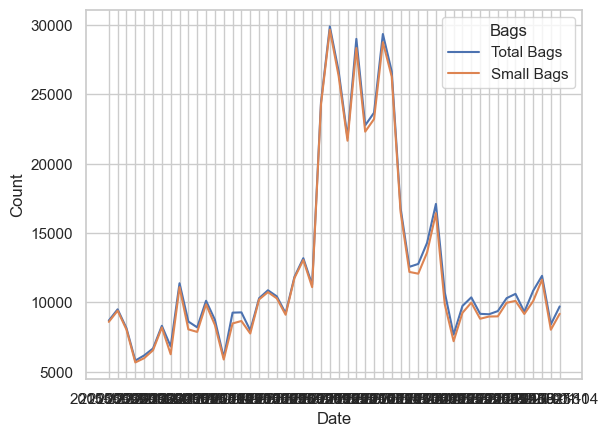

In [88]:
sns.lineplot(data=melted_df, x='Date', y='Count', hue='Bags')
plt.show()

In [90]:
df['Sales Volume'] = pd.qcut(df['Total Volume'], q=4, labels=['Poor', 'Modest', 'Good', 'Excellent'])
print(df.head().to_string(index=True))


   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225    4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region Sales Volume
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16     8696.87     8603.62       93.25          0.0  conventional  2015  Albany       Modest
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33     9505.56     9408.07       97.49          0.0  conventional  2015  Albany       Modest
2           2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50     8145.35     8042.21      103.14          0.0  conventional  2015  Albany         Good
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58     5811.16     5677.40      133.76          0.0  conventional  2015  Albany       Modest
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78     6183.95     5986.26      197.69          0.0  conventi

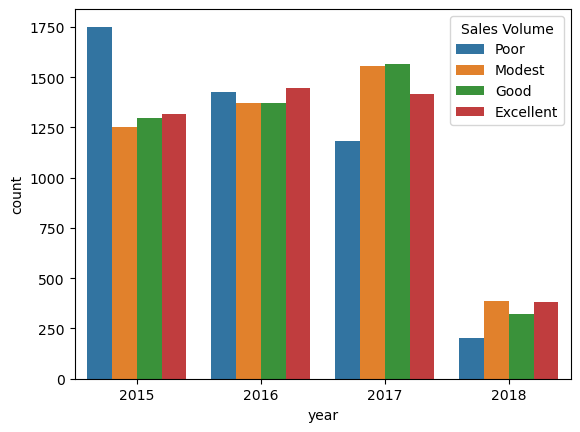

In [13]:
sns.countplot(data=df, x='year', hue='Sales Volume')
plt.show()


In [14]:
melted_bags_df = pd.melt(df, id_vars=['Date'], value_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], var_name='Bags', value_name='Count')
print(melted_bags_df)


            Date         Bags    Count
0     2015-12-27   Small Bags  8603.62
1     2015-12-20   Small Bags  9408.07
2     2015-12-13   Small Bags  8042.21
3     2015-12-06   Small Bags  5677.40
4     2015-11-29   Small Bags  5986.26
...          ...          ...      ...
54742 2018-02-04  XLarge Bags     0.00
54743 2018-01-28  XLarge Bags     0.00
54744 2018-01-21  XLarge Bags     0.00
54745 2018-01-14  XLarge Bags     0.00
54746 2018-01-07  XLarge Bags     0.00

[54747 rows x 3 columns]


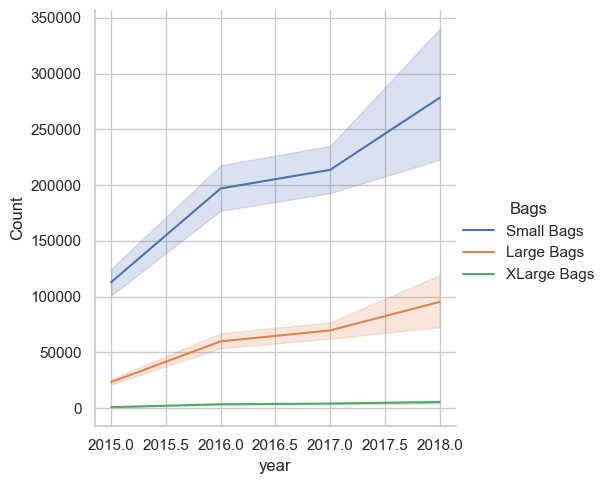

In [96]:
sns.relplot(data=melted_bags, kind='line', x='year', y='Count', hue='Bags')
plt.show()

## Based on the visualizations, small bags of avocados sells best.